In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("./data/Raisin_Dataset.xlsx")

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [7]:
df["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [4]:
# 독립변수, 종속변수 분리
x = df.drop(["Area", "Class"], axis = 1)
y = df[["Class"]]

In [5]:
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [10]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [7]:
# 독립변수 데이터 정규화 적용
mm = MinMaxScaler()
df_minmax = mm.fit_transform(x)

In [8]:
x = pd.DataFrame(df_minmax, columns = x.columns)   # 단위 맞춰줬음

In [9]:
x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [10]:
# 데이터 분할(7 : 3)
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, stratify = y,
                                                  random_state = 8)

In [11]:
# 데이터셋 확인
print(len(x_train), len(x_test))

630 270


- KNN 모델은 거리 기반으로 분류를 하기 때문에 독립변수의 스케일을 정규화
- 7 : 3 의 비율로 학습셋과 테스트셋을 분리

In [12]:
# 기본 KNN 모델 생성 및 적용
knn = KNeighborsClassifier(n_neighbors = 3, weights = "uniform", metric = "minkowski")    # weights = "uniform" : 기본값

In [13]:
# 학습
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# KNN 모델 평가
print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.9063492063492063
0.8518518518518519


In [17]:
np.sqrt(len(x_train))   # 루트 

25.099800796022265

In [19]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 미적용)

# k 수 범위 지정
k_num = range(1, 31, 2)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors = k, weights = "uniform")
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

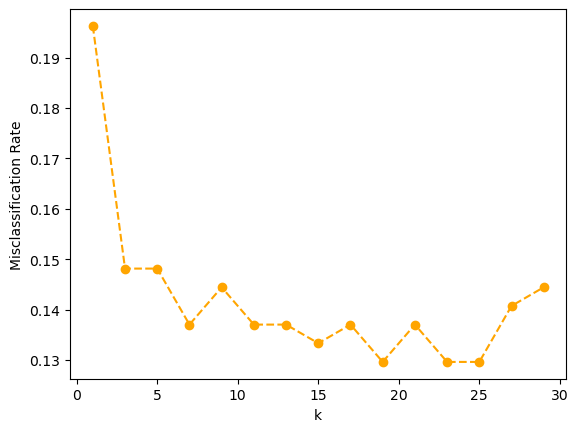

In [21]:
# 오분류율 그래프
plt.plot(k_num, accuracies, "o--", color = "orange")
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.show()

- 거리 가중치를 적용하지 않은 모델에서 k 이웃 수를 1에서 30까지 늘려가며 KNN 모델의 오분류율을 시각화
- 이웃 수가 19개일 때 오분류율이 가장 낮아져서 k는 19일 때 가장 적합함

In [22]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1, 31, 2)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))

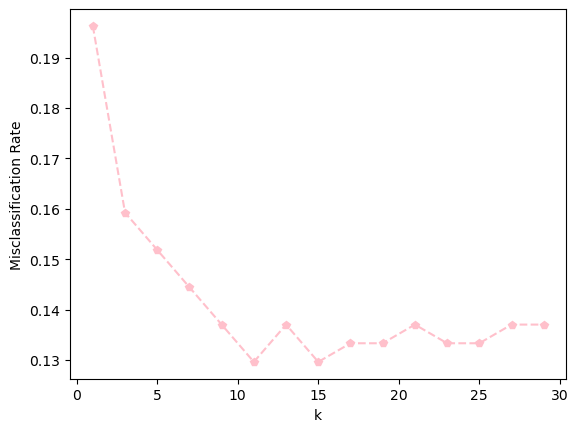

In [23]:
# 오분류율 그래프
plt.plot(k_num, accuracies, "p--", color = "pink")
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.show()

In [24]:
# 이웃 k 수 1 ~ 200까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1, 200, 2)

accuracies = []
for k in k_num:
    k_num_model_3 = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    k_num_model_3.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_3.score(x_test, y_test))

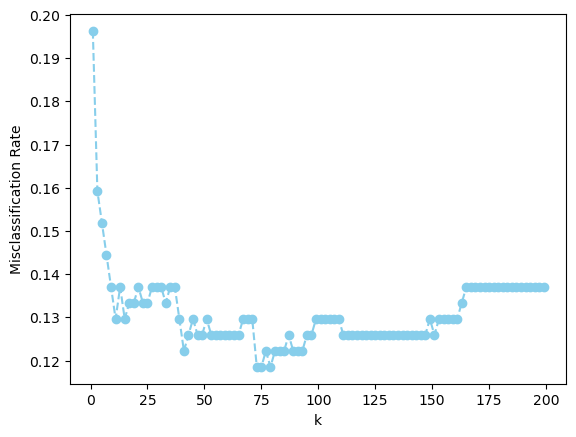

In [28]:
# 오분류율 그래프
plt.plot(k_num, accuracies, "o--", color = "skyblue")
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.show()

In [26]:
# 결정경계(decision boundary) 시각화

# 주성분 분석
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data = df_pca, columns = ["C1", "C2"])
df_pca.head()

,C1,C2
0,0.344337,-0.138577
1,-0.041114,-0.136161
2,-0.183317,-0.047906
3,-0.270750,0.009314
4,-0.418233,-0.201876


In [30]:
# 독립변수, 종속변수 전처리
df_x = df_pca.to_numpy()
df_y = y_test["Class"].to_numpy()

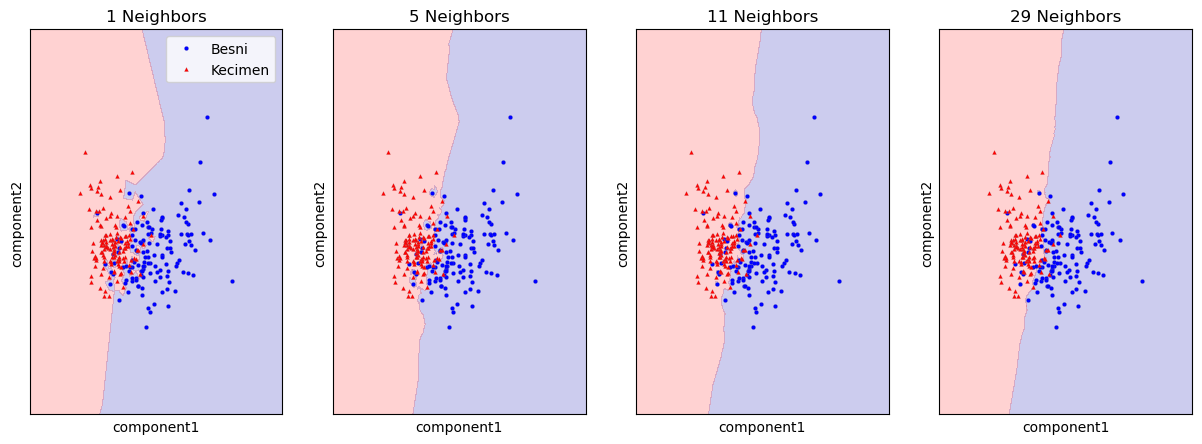

In [32]:
# 그래프 설정
cmap_bold = ListedColormap(["#FF0000", "00FF00"])
fig, axes = plt.subplots(1, 4, figsize = (15, 5))

# 이웃 수에 따른 결정경계
for n_neighbors, ax in zip([1, 5, 11, 29], axes):
    k_num_model = KNeighborsClassifier(n_neighbors = n_neighbors, weights = "distance")
    k_num_model.fit(df_x, df_y)
    
    mglearn.plots.plot_2d_separator(k_num_model, df_x, fill = True, eps = 0.5, ax = ax,
                                   alpha = 0.2)
    mglearn.discrete_scatter(df_x[:, 0], df_x[:, 1], df_y, markeredgewidth = 0.1,
                            c = ["b", "r"], s = 3, ax = ax)
    
    ax.set_xlabel("component1")
    ax.set_ylabel("component2")
    ax.set_title(f"{n_neighbors} Neighbors")
    
axes[0].legend()
plt.show()
                 